# Example Notebook: How to analyse synthetic data
This notebook will show, fairly compact, how to analyse the data that you have someone obtained. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from table_evaluator import load_data, TableEvaluator

In [3]:
real, fake = load_data('data/real_test_sample.csv', 'data/fake_test_sample.csv')

In [4]:
real.head()

,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date
0,951892,3245,3878.0,13680.0,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,2165
1,3547680,515,65.9,14898.6,CREDIT,UNKNOWN,INTEREST_CREDITED,2006
2,1187131,4066,32245.0,57995.5,CREDIT,COLLECTION_FROM_OTHER_BANK,UNKNOWN,2139
3,531421,1811,3990.8,23324.9,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,LOAN_PAYMENT,892
4,37081,119,12100.0,36580.0,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,654


In [5]:
fake.head()

,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date
0,911598,3001,13619.0,92079.0,CREDIT,COLLECTION_FROM_OTHER_BANK,UNKNOWN,1885
1,377371,1042,4174.0,32470.0,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,1483
2,970113,3225,274.0,57608.0,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,1855
3,450090,1489,301.0,36258.0,CREDIT,CREDIT_IN_CASH,UNKNOWN,885
4,1120409,3634,6303.0,50975.0,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,1211


In [6]:
cat_cols = ['trans_type', 'trans_operation', 'trans_k_symbol']

In [44]:
evaluator = TableEvaluator(real, fake, cat_cols=cat_cols)

### We can do a numerical analysis

In [45]:
evaluator.evaluate(target_col='trans_type')


Classifier F1-scores and their Jaccard similarities::
                                     f1_real  f1_fake  jaccard_similarity
index                                                                    
LogisticRegression_real_testset       0.7800   0.7750              0.9704
LogisticRegression_fake_testset       0.7550   0.7450              0.9048
RandomForestClassifier_real_testset   0.9850   0.9850              1.0000
RandomForestClassifier_fake_testset   0.9650   0.9650              1.0000
DecisionTreeClassifier_real_testset   0.9800   0.9650              0.9512
DecisionTreeClassifier_fake_testset   0.9600   0.9150              0.9139
MLPClassifier_real_testset            0.4000   0.5000              0.5326
MLPClassifier_fake_testset            0.4300   0.5450              0.4925

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    0.5655
nearest neighbor std                     0.

### But we can also do a visual analysis

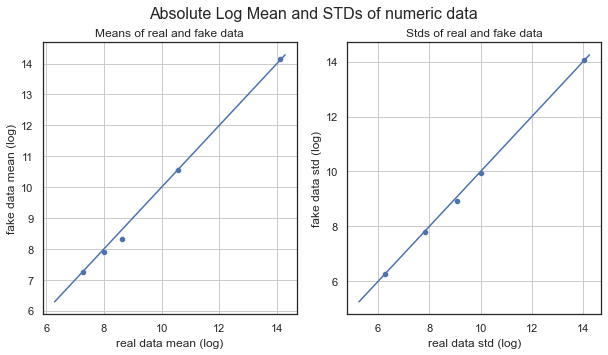

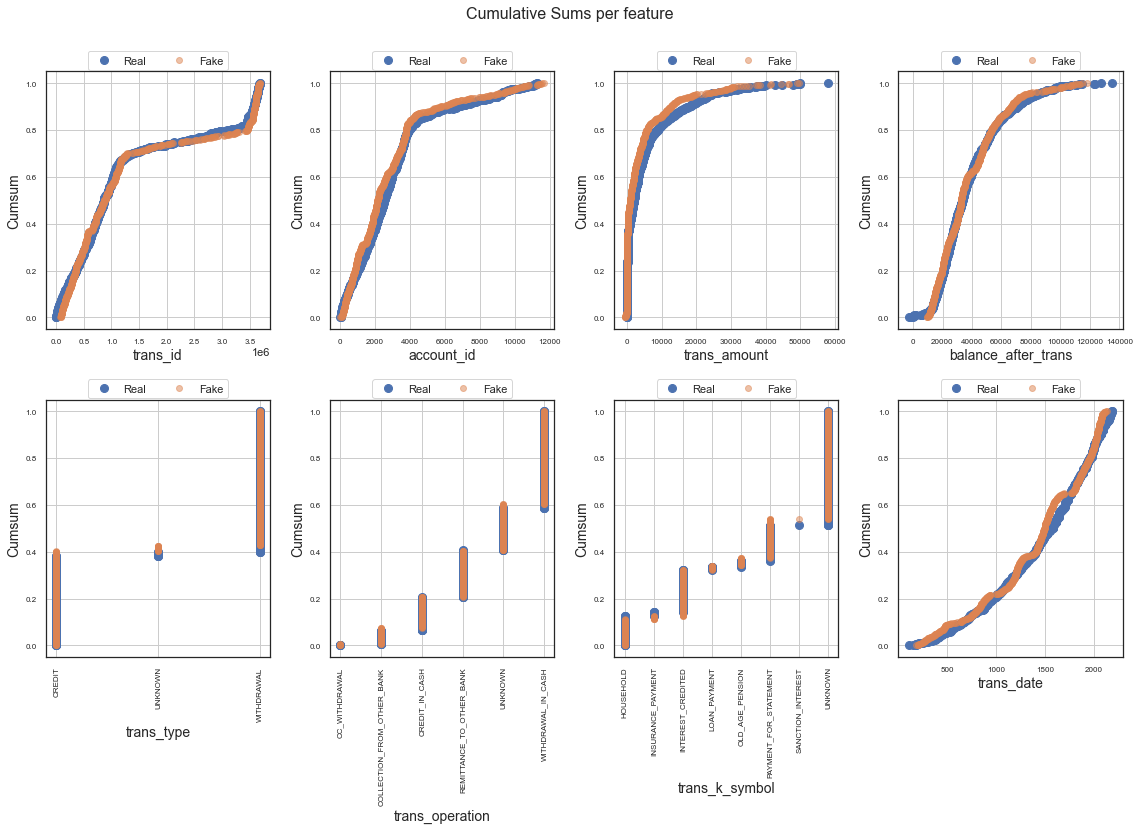

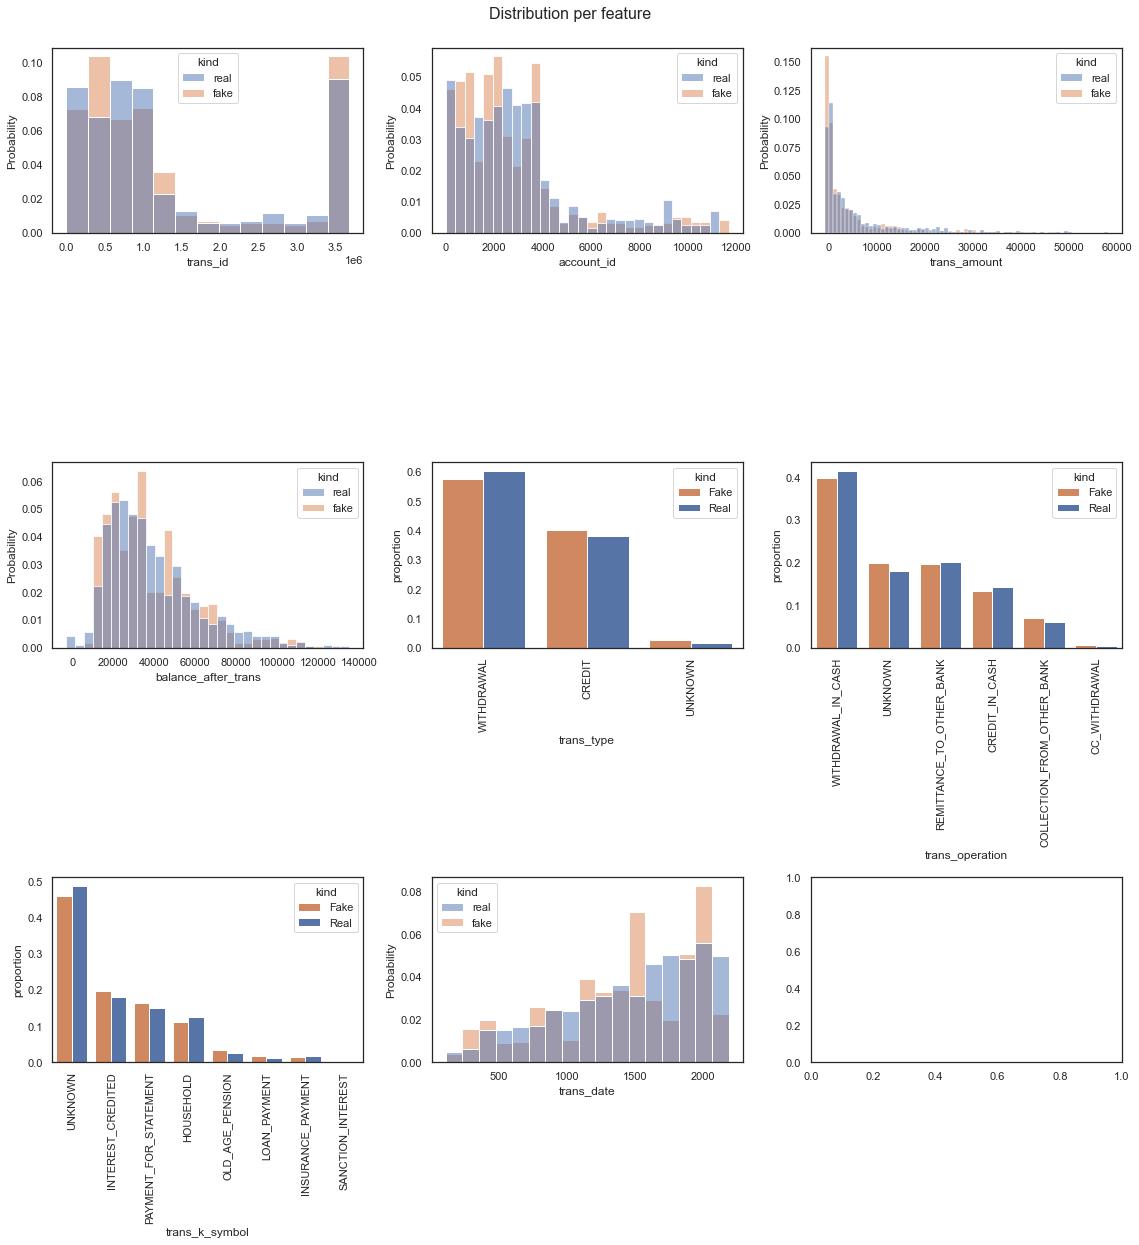

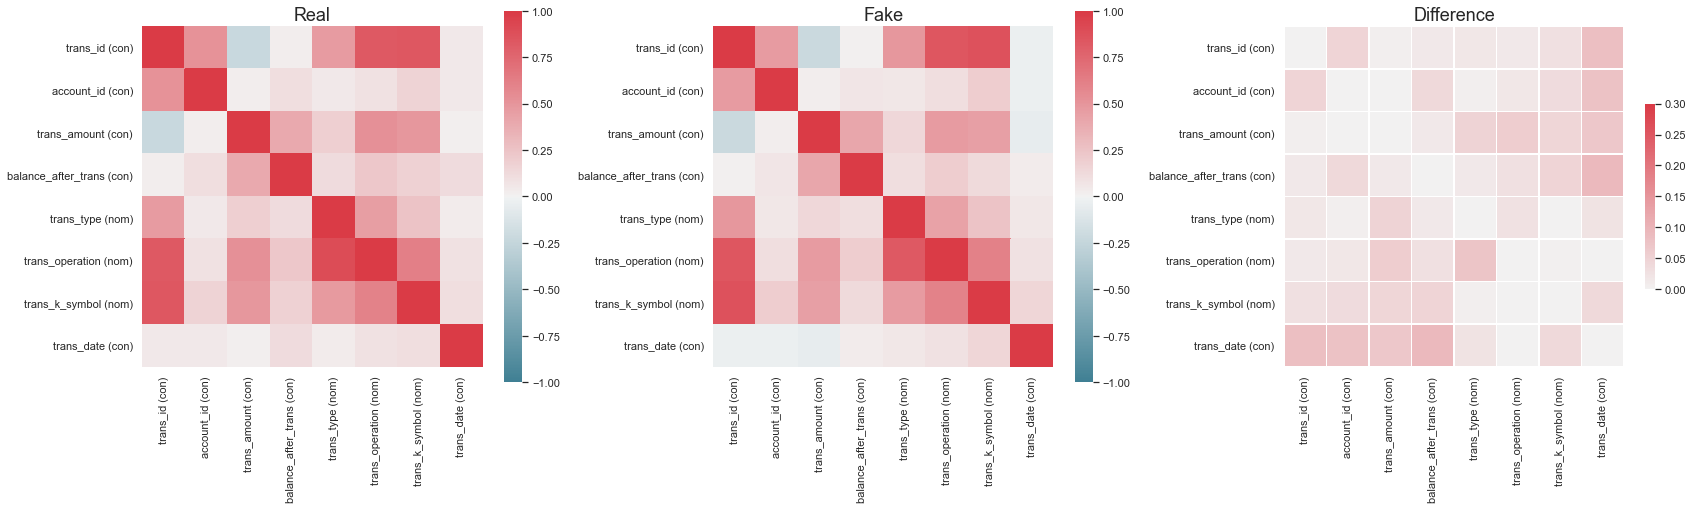

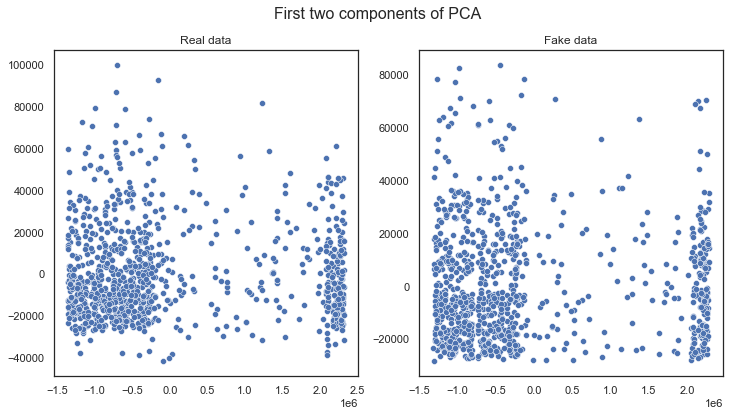

In [43]:
evaluator.visual_evaluation()